# SMOTE Over-sampling Analysis

Creates new samples by interpolation of samples of the minority class and any of its k nearest neighbours (also from the minority class). 

K is typically 5.

---

## Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

plt.style.use("dark_background")

%matplotlib inline

---

## Create Data

Two classes would be creates with one majority & one minority.

In [3]:
# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate Features
X, y = make_blobs(
    n_samples = num_samples_total,
    centers= centers,
    n_features= num_features_for_samples,
    cluster_std= cluster_std
)

# Transform arrays into pandas DataFrame
X = pd.DataFrame(X, columns= ["VarA", "VarB"])
y = pd.Series(y)


# Create an imbalanced feature set

X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state= 42)
], axis = 0)

y = y.loc[X.index]

# Display dataset size
X.shape, y.shape

((1000, 2), (1000,))

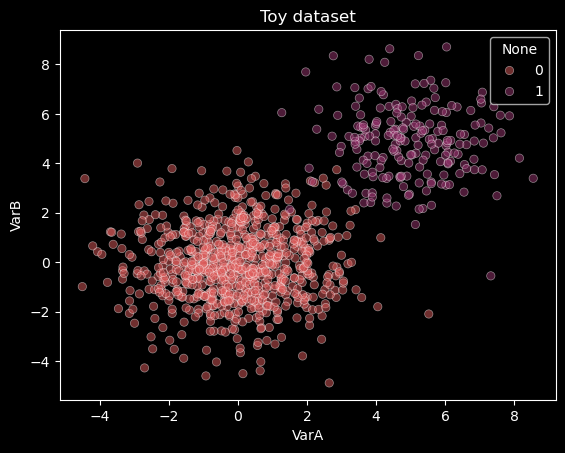

In [4]:
sns.scatterplot(
    data = X,
    x = "VarA",
    y = "VarB",
    hue = y,
    alpha = 0.5,
    palette= "flare"
)
plt.title("Toy dataset")
plt.show()

---

## SMOTE

In [5]:
sm = SMOTE(
    sampling_strategy= "auto", # samples only the minority class
    random_state = 0, 
    k_neighbors= 5,
)

X_res, y_res = sm.fit_resample(X, y)

In [6]:
# Size of the original dataset

X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# Size of the over-sampled dataset

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [8]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

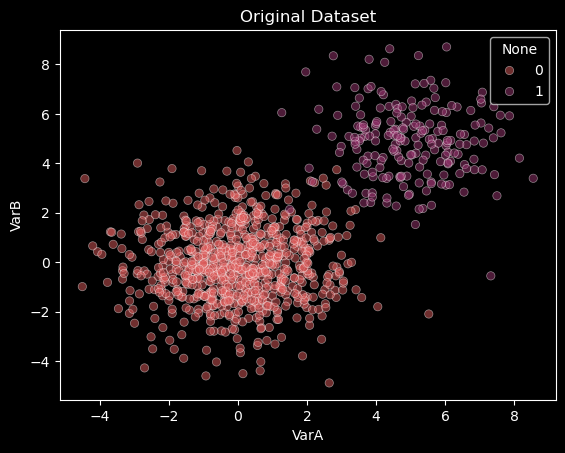

In [9]:
# Plot of original data

sns.scatterplot(
    data = X, 
    x = "VarA",
    y = "VarB",
    hue = y,
    alpha = 0.5,
    palette= "flare"
)
plt.title("Original Dataset")
plt.show()

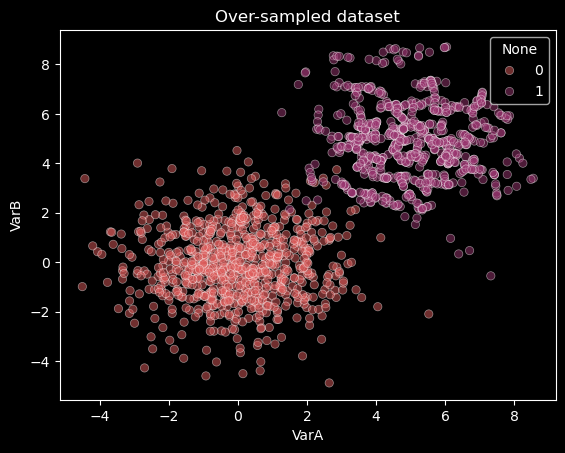

In [12]:
# Plot of over-sampled dataset

sns.scatterplot(
    data = X_res,
    x = "VarA",
    y = "VarB",
    hue = y_res,
    alpha = 0.5,
    palette= "flare"
)
plt.title("Over-sampled dataset")
plt.show()

<blockquote>There are now new observations that differ from the original ones.</blockquote>

---